In [2]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a series of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# ZIP packs the lats/lngs as pairs by zipping them with zip()

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [19]:
# coordinates
print(len(coordinates))

1500


In [5]:
# Import citipy 
from citipy import citipy

In [6]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

In [7]:
# note: The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.

In [11]:
# Import Dependencies, and Initialize an Empty List and Counters
# time library and datetime module from datetime library
import time
from datetime import datetime

# Import requests library and API key from config.py file
import requests as req
from config import weather_api_key

In [9]:
# starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# iterate through list of cities and begin building the URL for each city, while grouping our records in sets of 50.
# index to tell us when we get to 50, then tell the program to pause for 60 seconds using the time.sleep(60) command.
# The OpenWeatherMap API only allows 60 calls for per minute on their free tier, so pausing our program for one minute
# after each set of 50 will prevent time-out errors.

# # Loop Through the List of Cities and Build the City URL
# for i in range(len(cities))
    
#     # Group cities in sets of 50 for logging purposes
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)
        
    
#     # Create endpoint URL with each city
#     city_url = url + "&q=" + cities[i]

# Every time we want to reference the city in our code, we need to use the indexing on the cities list.
# Unfortunately, this will cause programming errors when we are building the city_url because it adds the index,
# not the city name, to the city_url. To fix this issue, we need to create another for loop to get the city from
# the cities list.

# Instead of using two for loops, we can use the enumerate() method as an alternative way to iterate through
# the list of cities and retrieve both the index, and the city from the list. The syntax for the enumerate()
# method is for i, item in enumerate(list):

# use enumerate() method to get the index of the city for logging purposes and the city for creating an endpoint URL
# Loop through all the cities in the list

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        print("Waiting 60s and starting new set.")
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1   
    
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date
                         })
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data loading is complete
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | sitka
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | severo-kurilsk
Processing Record 9 of Set 1 | portland
Processing Record 10 of Set 1 | ardabil
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | mar del plata
Processing Record 13 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 14 of Set 1 | schroeder
Processing Record 15 of Set 1 | cayenne
Processing Record 16 of Set 1 | lavrentiya
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | sao felix do xingu
Processing Record 20 of Set 1 | batemans bay
Processing Record 21 of Set 1 | mys shmidt

City not found. Skipping...
Processing Record 33 of Set 4 | yirol
City not found. Skipping...
Processing Record 34 of Set 4 | mitsamiouli
Processing Record 35 of Set 4 | iqaluit
Processing Record 36 of Set 4 | statesboro
Processing Record 37 of Set 4 | talaya
Processing Record 38 of Set 4 | belmonte
Processing Record 39 of Set 4 | clyde river
Processing Record 40 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 41 of Set 4 | ancud
Processing Record 42 of Set 4 | ilave
Processing Record 43 of Set 4 | seoul
Processing Record 44 of Set 4 | ilebo
Processing Record 45 of Set 4 | port augusta
Processing Record 46 of Set 4 | broken hill
Processing Record 47 of Set 4 | marcona
City not found. Skipping...
Processing Record 48 of Set 4 | katha
City not found. Skipping...
Processing Record 49 of Set 4 | san quintin
Processing Record 50 of Set 4 | leshukonskoye
Waiting 60s and starting new set.
Processing Record 1 of Set 5 | shimoda
Processing Record 2 of Set 5 | codrington
Pr

Processing Record 19 of Set 8 | niwari
Processing Record 20 of Set 8 | assiniboia
Processing Record 21 of Set 8 | ouango
Processing Record 22 of Set 8 | taoudenni
Processing Record 23 of Set 8 | marzuq
Processing Record 24 of Set 8 | wageningen
Processing Record 25 of Set 8 | saint-philippe
Processing Record 26 of Set 8 | altay
Processing Record 27 of Set 8 | moree
Processing Record 28 of Set 8 | pitimbu
Processing Record 29 of Set 8 | yerbogachen
Processing Record 30 of Set 8 | soria
Processing Record 31 of Set 8 | provideniya
Processing Record 32 of Set 8 | kaniama
Processing Record 33 of Set 8 | sento se
City not found. Skipping...
Processing Record 34 of Set 8 | bestobe
Processing Record 35 of Set 8 | the valley
Processing Record 36 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 37 of Set 8 | santiago del estero
Processing Record 38 of Set 8 | mizan teferi
Processing Record 39 of Set 8 | antofagasta
Processing Record 40 of Set 8 | yucaipa
Processing Record 41 of S

Processing Record 6 of Set 12 | pervomayskoye
Processing Record 7 of Set 12 | pangody
Processing Record 8 of Set 12 | moron
Processing Record 9 of Set 12 | sheffield
Processing Record 10 of Set 12 | gayny
Processing Record 11 of Set 12 | zeya
Processing Record 12 of Set 12 | pishin
Processing Record 13 of Set 12 | riviere-au-renard
Processing Record 14 of Set 12 | san cristobal
Processing Record 15 of Set 12 | villa carlos paz
Processing Record 16 of Set 12 | lesnoy
Processing Record 17 of Set 12 | altenstadt
Processing Record 18 of Set 12 | quatre cocos
Processing Record 19 of Set 12 | challans
Processing Record 20 of Set 12 | winslow
Processing Record 21 of Set 12 | paraiso
Processing Record 22 of Set 12 | le port
Processing Record 23 of Set 12 | jepelacio
Processing Record 24 of Set 12 | dicabisagan
Processing Record 25 of Set 12 | smithers
Processing Record 26 of Set 12 | bealanana
Processing Record 27 of Set 12 | peniche
Processing Record 28 of Set 12 | aljezur
Processing Record 2

In [18]:
print(len(city_data))

565


In [20]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.7868,-56.1549,-0.54,88,42,6.49,GL,2022-04-25 03:19:29
1,Sitka,57.0531,-135.3300,46.29,76,75,9.22,US,2022-04-25 03:21:21
2,Ushuaia,-54.8000,-68.3000,37.06,81,0,5.75,AR,2022-04-25 03:18:12
3,Punta Arenas,-53.1500,-70.9167,42.91,87,100,10.36,CL,2022-04-25 03:22:13
4,Mataura,-46.1927,168.8643,53.47,82,92,12.86,NZ,2022-04-25 03:18:13


In [23]:
new_col_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_col_order]
city_data_df.tail()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
560,Venado,MX,2022-04-25 03:38:56,22.9333,-101.0833,67.60,72,57,11.41
561,Husavik,IS,2022-04-25 03:38:57,66.0449,-17.3389,41.76,90,100,1.50
562,Hualmay,PE,2022-04-25 03:38:57,-11.0964,-77.6139,66.94,87,59,9.17
563,Alice Springs,AU,2022-04-25 03:38:58,-23.7000,133.8833,67.55,77,100,3.44
564,Yuncheng,CN,2022-04-25 03:38:58,35.0231,110.9928,78.39,38,14,5.50


In [24]:
# Create the output file (csv)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [1]:
# DAY2:  CREATE SCATTER PLOTS to compare LATITUDE with each weather parameter collected

In [3]:
# Read file from yesterday so as not to rerun API and parsing data
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Upernavik,GL,2022-04-25 03:19:29,72.7868,-56.1549,-0.54,88,42,6.49
1,1,Sitka,US,2022-04-25 03:21:21,57.0531,-135.3300,46.29,76,75,9.22
2,2,Ushuaia,AR,2022-04-25 03:18:12,-54.8000,-68.3000,37.06,81,0,5.75
3,3,Punta Arenas,CL,2022-04-25 03:22:13,-53.1500,-70.9167,42.91,87,100,10.36
4,4,Mataura,NZ,2022-04-25 03:18:13,-46.1927,168.8643,53.47,82,92,12.86


In [4]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

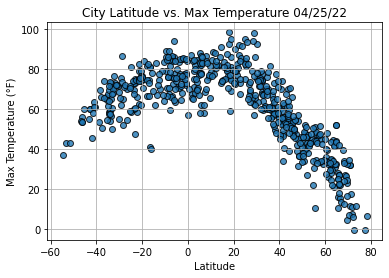

In [9]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps, edgecolor='k',
           linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

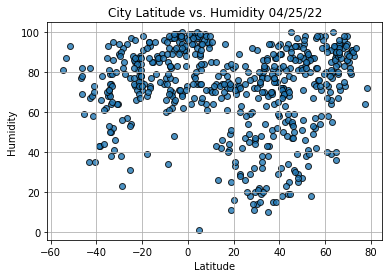

In [10]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, humidity, edgecolor='k',
           linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

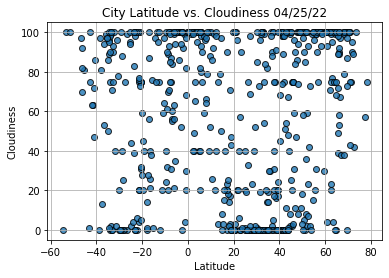

In [11]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, cloudiness, edgecolor='k',
           linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

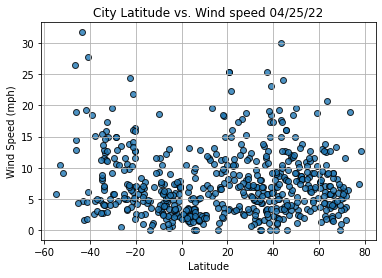

In [12]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, wind_speed, edgecolor='k',
           linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()